In [1]:
### Project 2 Airbnb Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import glob
import datetime
import matplotlib.ticker as mtick

%matplotlib inline

In [2]:
# import & conbine data
total_listings=pd.DataFrame()
for filename in glob.iglob('./**/**/listings.csv',recursive=False):
    print(filename)
    data=pd.read_csv(filename,error_bad_lines=False,low_memory=False,encoding='ISO-8859-1')
    total_listings=total_listings.append(data)
    
    

.\2015-01-01\data\listings.csv
.\2015-03-01\data\listings.csv
.\2015-04-01\data\listings.csv
.\2015-05-01\data\listings.csv
.\2015-06-01\data\listings.csv
.\2015-08-01\data\listings.csv
.\2015-09-01\data\listings.csv
.\2015-10-01\data\listings.csv
.\2015-11-01\data\listings.csv
.\2015-12-02\data\listings.csv
.\2016-01-01\data\listings.csv
.\2016-02-02\data\listings.csv
.\2016-04-03\data\listings.csv
.\2016-05-02\data\listings.csv
.\2016-06-02\data\listings.csv
.\2016-07-02\data\listings.csv
.\2016-08-02\data\listings.csv
.\2016-09-02\data\listings.csv
.\2016-10-01\data\listings.csv
.\2016-11-02\data\listings.csv
.\2016-12-03\data\listings.csv
.\2017-01-01\data\listings.csv
.\2017-02-02\data\listings.csv
.\2017-03-02\data\listings.csv
.\2017-04-02\data\listings.csv
.\2017-05-02\data\listings.csv


In [3]:
# create row index as id + calendar_last_scraped
total_listings['id_date']=total_listings['id'].map(str)+"_"+total_listings['last_scraped']
total_listings=total_listings.set_index(['id_date'])

In [4]:
# create date column
total_listings['date']=pd.to_datetime(total_listings['last_scraped']).dt.strftime('%Y-%m')

In [5]:
(total_listings.isnull().sum()/total_listings.shape[0]*100).sort_values(ascending=False)

license                        100.000000
jurisdiction_names              99.986355
square_feet                     97.917313
host_listing_count              96.985683
monthly_price                   71.868212
has_availability                71.108690
interaction                     70.574208
access                          69.266339
notes                           67.985430
weekly_price                    65.957215
house_rules                     65.818010
security_deposit                61.593433
host_acceptance_rate            52.762977
neighborhood_overview           49.443179
transit                         45.844090
cleaning_fee                    41.881417
host_about                      34.077449
medium_url                      28.749023
xl_picture_url                  28.749023
thumbnail_url                   28.749023
space                           28.321394
reviews_per_month               26.845047
review_scores_checkin           26.711564
review_scores_value             26

In [6]:
total_listings['state'].unique()

array(['NY', nan, 'Queens NY 11377, USA', 'Ny', 'ny', 'CA', 'OR', 'OK',
       'MP', 'DO', 'NJ', 'New York', 'FL', 'CO', 'bx', 'DC', 'VT', 'MA'], dtype=object)

In [7]:
# drop rows where state is not NY, ny, Ny, New York, Queens NY 11377, USA, and bx
total_listings=total_listings.loc[total_listings['state'].isin(['NY', 'ny', 'Ny','New York','Queens NY 11377, USA', 'bx'])]


In [8]:
# check state again
total_listings['state'].unique()

array(['NY', 'Queens NY 11377, USA', 'Ny', 'ny', 'New York', 'bx'], dtype=object)

In [9]:
# clean the price formatting
total_listings['price'] = total_listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))
total_listings['price'].dtype

dtype('int64')

In [10]:
# drop columns which have missing value over 20% and columns that are not related to analysis

total_listings_clean=total_listings.dropna(thresh=0.80*total_listings.shape[0],axis=1)
total_listings_clean.dropna(how='all', inplace=True)
total_listings_clean=total_listings_clean.drop(['calendar_updated','country_code','country','experiences_offered',
                                                'host_total_listings_count','market','neighbourhood','neighbourhood_group_cleansed',
                                                'scrape_id','smart_location','street','summary','host_picture_url',
                                               'host_thumbnail_url','host_url','listing_url','picture_url',
                                                'calendar_last_scraped'],axis=1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
list(total_listings_clean)

['accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'cancellation_policy',
 'city',
 'description',
 'extra_people',
 'guests_included',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_since',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'last_scraped',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'price',
 'property_type',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'state',
 'zipcode',
 'date']

In [12]:
# convert features to boolean
for feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:
    total_listings_clean[feature] = total_listings_clean[feature].map(lambda s: False if s == "f" else True)

In [13]:
# create dummmies for property characteristics
features = pd.DataFrame()
for feature in ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']:
    features = pd.concat([features, pd.get_dummies(total_listings_clean[feature])], axis=1)

#total_listings_clean.drop(['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type'],axis=1, inplace=True)
total_listings_clean=total_listings_clean.merge(features,left_index=True,right_index=True)


In [14]:
# parse amenities
total_listings_clean.amenities = total_listings_clean.amenities.str.replace("[{}]", "")
total_listings_clean.amenities = total_listings_clean.amenities.str.replace('"', '')
amenities = total_listings_clean.amenities.str.get_dummies(sep = ",")


In [15]:
amenities.shape


(908557, 122)

In [16]:
amenities


,24-Hour Check-in,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air Conditioning,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,...,Wheelchair Accessible,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower and toilet,Wide doorway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
id_date,,,,,,,,,,,,,,,,,,,,,
1069266_2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1846722_2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2061725_2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44974_2015-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4701675_2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68914_2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4832596_2015-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2562510_2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3005360_2015-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
feature

'bed_type'

In [18]:
# merge edited amenities back to total_listings
total_listings_clean_ame=total_listings_clean.merge(amenities,left_index=True,right_index=True)
total_listings_clean_ame.dropna(subset=['amenities'], inplace=True) 
total_listings_clean_ame.drop(['amenities'],axis=1, inplace=True)
total_listings_clean_ame

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,...,Wheelchair Accessible,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower and toilet,Wide doorway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
id_date,,,,,,,,,,,,,,,,,,,,,
4622922_2015-08-01,2,0.0,212.0,0.0,0.0,1.0,Real Bed,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
958444_2015-08-01,4,5.0,279.0,5.0,6.0,1.0,Real Bed,1.0,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3943387_2015-08-01,2,0.0,326.0,21.0,51.0,1.0,Real Bed,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3362669_2015-08-01,2,20.0,347.0,42.0,72.0,1.0,Real Bed,1.0,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6627449_2015-08-01,3,6.0,309.0,8.0,34.0,1.0,Real Bed,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
5557381_2015-08-01,4,16.0,339.0,41.0,71.0,1.0,Real Bed,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1886820_2015-08-01,4,0.0,239.0,0.0,0.0,3.0,Real Bed,3.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4462008_2015-08-01,2,4.0,319.0,17.0,44.0,1.0,Real Bed,1.0,2.0,4.0,...,0,0,0,0,0,0,0,1,0,0
260566_2015-08-01,2,3.0,155.0,3.0,3.0,1.0,Real Bed,1.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
list(total_listings_clean)

['accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'cancellation_policy',
 'city',
 'description',
 'extra_people',
 'guests_included',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_since',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'last_scraped',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'price',
 'property_type',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'state',
 'zipcode',
 'date',
 'Allerton',
 'Alphabet City',
 'Arden Heights',
 'Arrochar',
 'Arverne',
 'Astoria',
 'Bath Beach',
 'Battery Park City',
 'Bay Ridge',
 'Bay Terrace',
 'Bay Terrace, Staten Island',

In [20]:
# number of listings over time
data_number_of_listings=total_listings.groupby(['date']).size()
data_number_of_listings.head()

date
2015-01    27390
2015-03    27097
2015-04    27408
2015-05    27316
2015-06    27465
dtype: int64

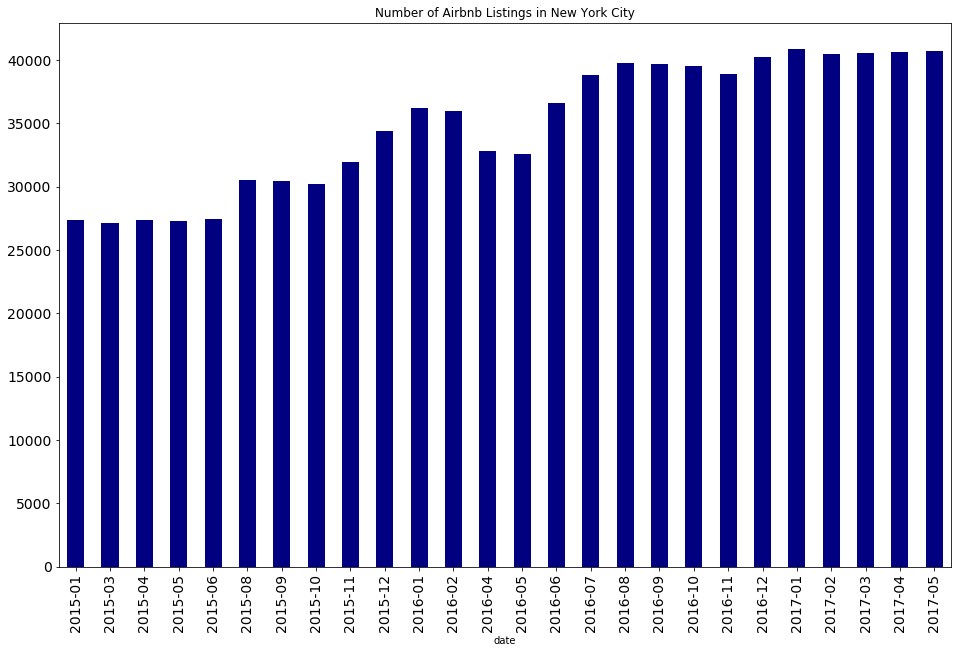

In [21]:
# graph number of listings over time
data_number_of_listings.plot(kind='bar',figsize=(16,10),legend=False, color='navy',fontsize=14,
                             title='Number of Airbnb Listings in New York City')


In [22]:
# total size of listings in squared feet over time: approximated by using number of bedrooms and bathrooms
total_listings['size']=(total_listings['bedrooms']+0.5*total_listings['bathrooms'])*150
data_size_of_listings=total_listings[['date','size']].dropna(0)
data_size_of_listings=data_size_of_listings.groupby('date').sum()


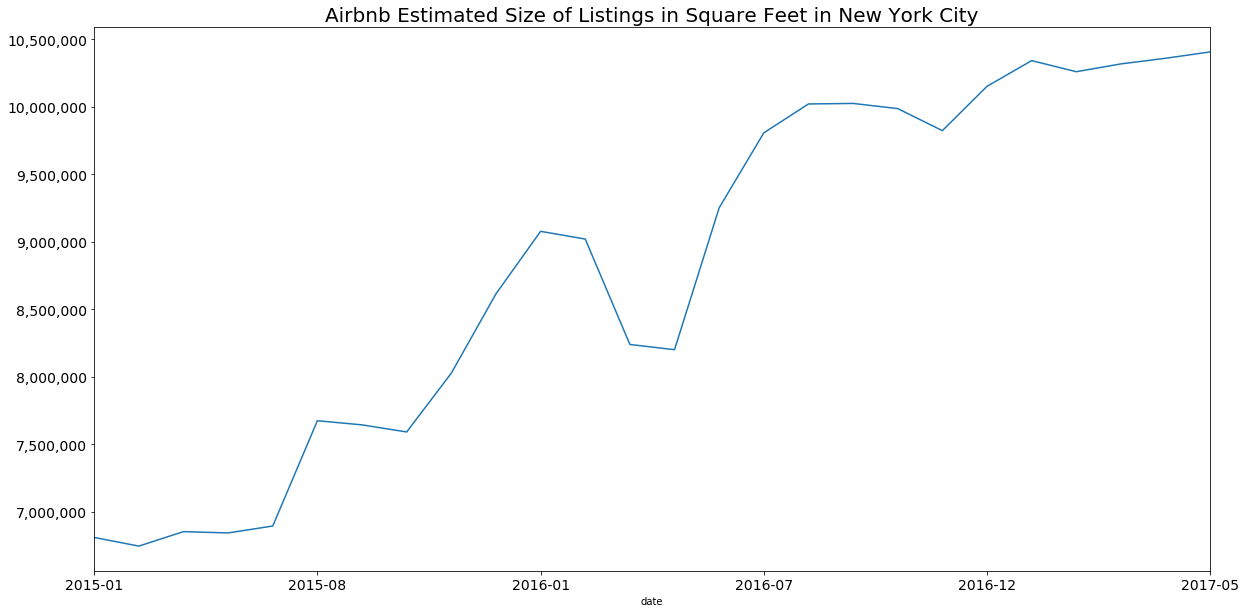

In [23]:
# graph size of listings over time
ax=data_size_of_listings.plot(figsize=(20,10),fontsize=14,legend=False)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Airbnb Estimated Size of Listings in Square Feet in New York City',fontsize=20)

In [24]:
# listing room type percentage in May 2017
total_listings_room_type=total_listings_clean[['date','Entire home/apt', 'Private room', 'Shared room']]


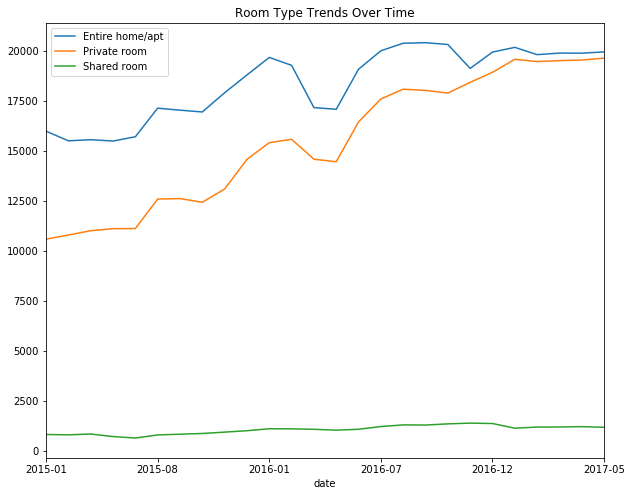

In [25]:
total_listings_room_type.groupby('date').sum().plot(title='Room Type Trends Over Time',figsize=(10,8))

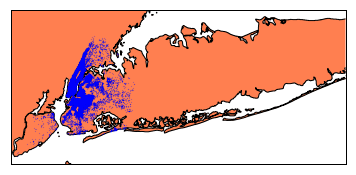

In [26]:
# listing geo graph of May 2017 using Basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
;
df = total_listings[['id','latitude','longitude','zipcode','neighbourhood_cleansed','date']]
df = df[df['date']=='2017-05']
my_map = Basemap(projection='merc', lat_0 = 40, lon_0 = -73,
    resolution = 'f', area_thresh = 0.01,
    llcrnrlon=-74.2700, llcrnrlat=40.4700,
    urcrnrlon=-72.7500, urcrnrlat=41.0000,
                epsg=3857)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()

lon = df['longitude'].values
lat = df['latitude'].values
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=0.1)

In [27]:
total_listings[total_listings['date']=='2015-05'].sum()

access                                                                            NaN
accommodates                                                                    78508
amenities                                                                         NaN
availability_30                                                                242671
availability_365                                                          6.46196e+06
availability_60                                                                606278
availability_90                                                           1.04793e+06
bathrooms                                                                     30157.5
bed_type                            Real BedReal BedReal BedReal BedReal BedReal B...
bedrooms                                                                        31005
beds                                                                            41420
calculated_host_listings_count                        

In [28]:
total_listings_room_type.head()


,date,Entire home/apt,Private room,Shared room
id_date,,,,
1069266_2015-01-02,2015-01,1,0,0
1846722_2015-01-02,2015-01,1,0,0
2061725_2015-01-02,2015-01,0,1,0
44974_2015-01-03,2015-01,1,0,0
4701675_2015-01-02,2015-01,1,0,0


In [29]:
total_listings[['id','latitude','longitude','zipcode','neighbourhood_cleansed','date']]

,id,latitude,longitude,zipcode,neighbourhood_cleansed,date
id_date,,,,,,
1069266_2015-01-02,1069266,40.756852,-73.964754,10022,Midtown East,2015-01
1846722_2015-01-02,1846722,40.830599,-73.941014,NaN,Hamilton Heights,2015-01
2061725_2015-01-02,2061725,40.692189,-73.924120,11221,Bushwick,2015-01
44974_2015-01-03,44974,40.734751,-74.002592,10011,West Village,2015-01
4701675_2015-01-02,4701675,40.745282,-73.997836,10011,Chelsea,2015-01
68914_2015-01-02,68914,40.679060,-73.994730,11231,Carroll Gardens,2015-01
4832596_2015-01-03,4832596,40.684422,-73.909882,11207,Bushwick,2015-01
2562510_2015-01-02,2562510,40.719319,-73.997247,10013,Chinatown,2015-01
3005360_2015-01-03,3005360,40.726022,-73.986418,10003,East Village,2015-01


In [30]:
#Trend analysis and visualization
data = pd.read_csv('./2017-05-02/data/listings_visual.csv')
listings_by_host = data['host_id'].value_counts()
top10_listings = listings_by_host.nlargest(n=int(len(listings_by_host)*0.1)).sum()

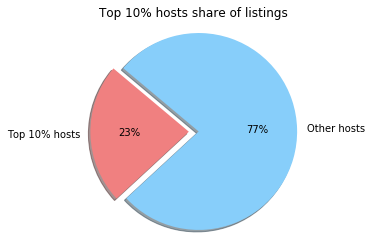

In [31]:
labels = 'Top 10% hosts', 'Other hosts'
sizes = [top10_listings/listings_by_host.sum(), 1-top10_listings/listings_by_host.sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Top 10% hosts share of listings')
plt.show()



In [32]:
value_by_host = data.groupby(['host_id']).sum().price
top10_value = value_by_host.nlargest(n=int(len(value_by_host)*0.1)).sum()

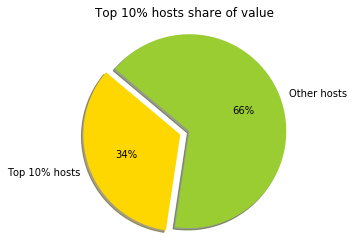

In [33]:
labels = 'Top 10% hosts', 'Other hosts'
sizes = [top10_value/value_by_host.sum(), 1-top10_value/value_by_host.sum()]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Top 10% hosts share of value')
plt.show()

1     30356
2      2743
3       680
4       252
5       109
6        60
7        35
8        26
11       11
10        9
9         8
18        2
20        1
12        1
13        1
14        1
15        1
35        1
16        1
33        1
28        1
Name: host_id, dtype: int64

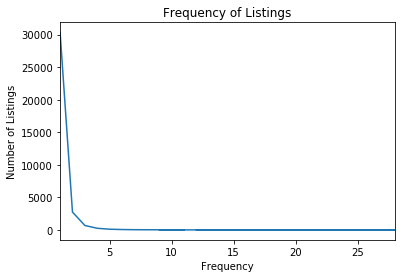

In [34]:
ax = listings_by_host.value_counts().plot()
ax.set(xlabel="Frequency", ylabel="Number of Listings", title='Frequency of Listings')
listings_by_host.value_counts()

0      0.298579
365    0.037690
364    0.019974
89     0.009275
363    0.007975
90     0.006282
1      0.005791
362    0.005766
88     0.005325
122    0.005006
2      0.004834
3      0.004589
336    0.004540
4      0.004515
179    0.004441
358    0.004417
123    0.004196
180    0.003902
8      0.003607
306    0.003558
7      0.003509
87     0.003509
337    0.003484
357    0.003435
5      0.003362
361    0.003264
9      0.003239
348    0.003239
83     0.003190
61     0.003190
         ...   
226    0.000761
196    0.000736
108    0.000736
194    0.000712
182    0.000712
236    0.000712
181    0.000687
195    0.000687
199    0.000687
204    0.000687
238    0.000687
209    0.000687
203    0.000687
114    0.000687
210    0.000687
222    0.000663
205    0.000663
225    0.000663
191    0.000663
198    0.000663
186    0.000638
232    0.000638
212    0.000589
211    0.000589
192    0.000564
188    0.000540
189    0.000540
193    0.000491
190    0.000491
201    0.000466
Name: availability_365, 

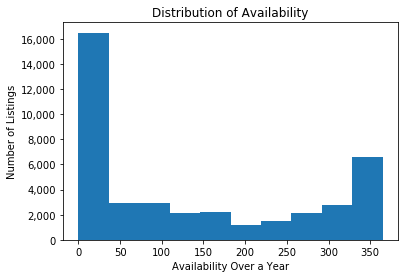

In [35]:
ax = data['availability_365'].plot.hist()
ax.set(xlabel="Availability Over a Year", ylabel="Number of Listings", title='Distribution of Availability')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
print(data['availability_365'].value_counts(normalize=True))

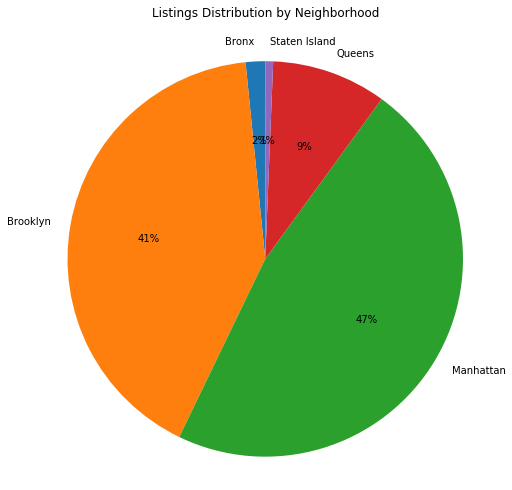

neighbourhood_group
Bronx              649
Brooklyn         16810
Manhattan        19212
Queens            3821
Staten Island      261
Name: id, dtype: int64


In [36]:
labels = 'Bronx', 'Brooklyn','Manhattan','Queens','Staten Island '
explode = (0.1,0,0,0,0)  # explode 1st slice

neighbourhood_dist = data.groupby('neighbourhood_group').id.count()

ax = neighbourhood_dist.plot(kind='pie', autopct='%1.0f%%', startangle=90,figsize=(8,8))
ax.set(ylabel="")
 
plt.axis('equal')
plt.title('Listings Distribution by Neighborhood', x=0.5,y=1.05)
plt.show()
print(neighbourhood_dist)

In [37]:
full_data = pd.read_csv('./2017-05-02/data/listings.csv',low_memory=False)

In [38]:
# parse amenities
full_data.amenities = full_data.amenities.str.replace("[{}]", "")
full_data.amenities = full_data.amenities.str.replace('"', '')
amenities = full_data.amenities.str.get_dummies(sep = ",")


In [39]:
top_amenities = amenities.sum().sort_values(ascending=False).head(11)

In [40]:
top_amenities

Wireless Internet           39373
Kitchen                     38117
Heating                     37729
Essentials                  33642
Air conditioning            33368
Smoke detector              32068
Internet                    27049
TV                          25832
Shampoo                     24447
Carbon monoxide detector    24172
Hangers                     23747
dtype: int64

In [41]:
top_amenities = top_amenities.reset_index().replace({'index': {'Wireless Internet':'Internet'}}).groupby('index', sort=False).sum()

In [42]:
top_amenities

,0
index,
Internet,66422
Kitchen,38117
Heating,37729
Essentials,33642
Air conditioning,33368
Smoke detector,32068
TV,25832
Shampoo,24447
Carbon monoxide detector,24172


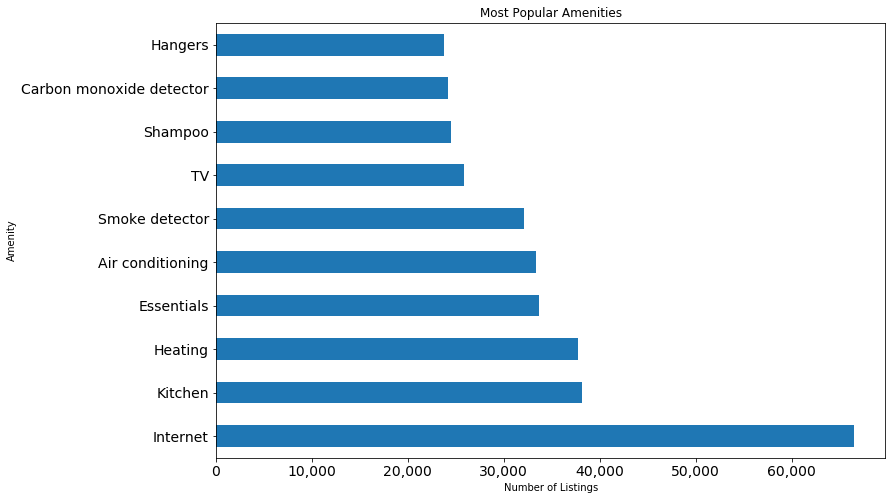

In [43]:
import matplotlib.ticker as mtick
ax = top_amenities.plot(kind='barh', legend=False, title='Most Popular Amenities',figsize=(12,8),fontsize=14)
ax.set(ylabel="Amenity", xlabel="Number of Listings")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
